# Real or Not? NLP with Disaster Tweets

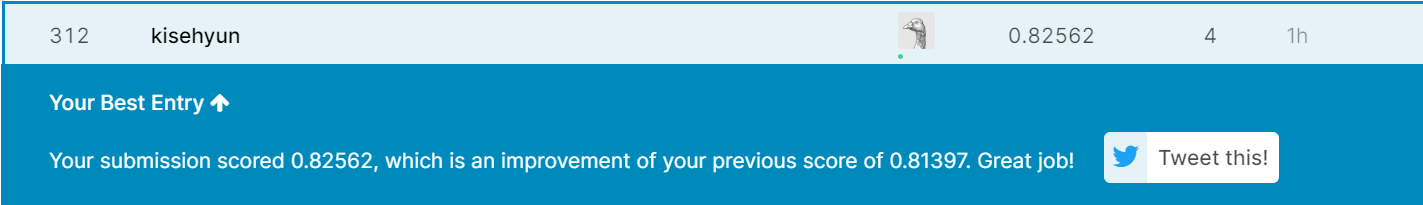

In [2]:
from IPython.display import Image
Image("kaggle_312.png")

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd /content/gdrive/My Drive/mlp_disaster/nlp-getting-started

/content/gdrive/My Drive/mlp_disaster/nlp-getting-started


In [3]:
import os
import pandas as pd
import numpy as np
import random

In [ ]:
for dirname, _, files in os.walk('/content/gdrive/My Drive/mlp_disaster/nlp-getting-started'):
  for f in files:
    print(os.path.join(dirname, f))

/content/gdrive/My Drive/mlp_disaster/nlp-getting-started/test.csv
/content/gdrive/My Drive/mlp_disaster/nlp-getting-started/train.csv
/content/gdrive/My Drive/mlp_disaster/nlp-getting-started/sample_submission.csv
/content/gdrive/My Drive/mlp_disaster/nlp-getting-started/model1.h5
/content/gdrive/My Drive/mlp_disaster/nlp-getting-started/model2.h5
/content/gdrive/My Drive/mlp_disaster/nlp-getting-started/model3.h5
/content/gdrive/My Drive/mlp_disaster/nlp-getting-started/model4.h5
/content/gdrive/My Drive/mlp_disaster/nlp-getting-started/model5.h5
/content/gdrive/My Drive/mlp_disaster/nlp-getting-started/model6.h5
/content/gdrive/My Drive/mlp_disaster/nlp-getting-started/1st.csv
/content/gdrive/My Drive/mlp_disaster/nlp-getting-started/2nd.csv


In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [ ]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [ ]:
train.drop(['keyword', 'location'], axis = 1, inplace = True)
test.drop(['keyword', 'location'], axis = 1, inplace = True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


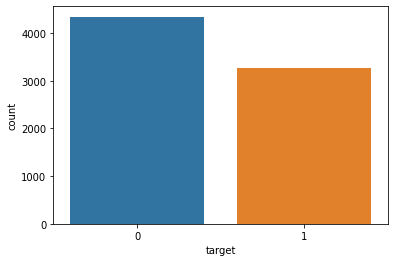

In [ ]:
sns.countplot(train.target)
plt.show()

In [ ]:
train['length_text'] = train.text.map(lambda x : len(x))
test['length_text'] = test.text.map(lambda x : len(x))

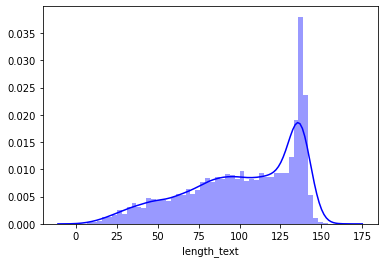

In [ ]:
sns.distplot(train.length_text, color = 'b', bins = 50)
plt.show()

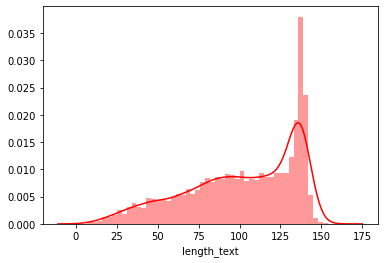

In [ ]:
sns.distplot(train.length_text, color = 'r', bins = 50)
plt.show()

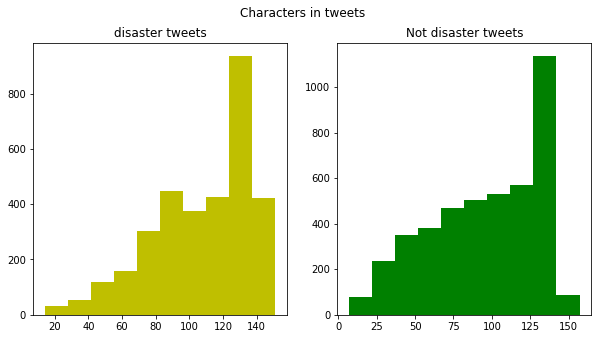

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
ax1.hist(train.loc[train.target == 1].length_text, color = 'y')
ax1.set_title('disaster tweets')
ax2.hist(train.loc[train.target == 0].length_text, color = 'g')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

In [ ]:
train['count_words'] = [len(x) for x in train.text.str.split()]

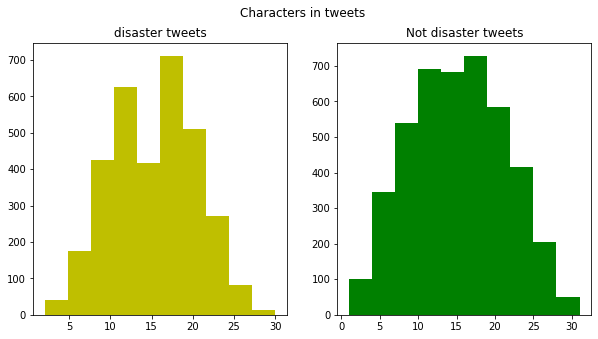

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
ax1.hist(train.loc[train.target == 1].count_words, color = 'y')
ax1.set_title('disaster tweets')
ax2.hist(train.loc[train.target == 0].count_words, color = 'g')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

In [ ]:
corpus = []

for t in train.text.str.split():
  for c in t:
    corpus.append(c)

In [ ]:
corpus[:10]

['Our',
 'Deeds',
 'are',
 'the',
 'Reason',
 'of',
 'this',
 '#earthquake',
 'May',
 'ALLAH']

In [ ]:
from collections import Counter

In [ ]:
count = Counter(corpus)

In [ ]:
count.most_common(10)

[('the', 2575),
 ('a', 1845),
 ('to', 1805),
 ('in', 1757),
 ('of', 1722),
 ('and', 1302),
 ('I', 1197),
 ('for', 820),
 ('is', 814),
 ('on', 773)]

In [ ]:
c = [c for c, n in count.most_common(10)]
n = [n for c, n in count.most_common(10)]

In [ ]:
c,n

(['the', 'a', 'to', 'in', 'of', 'and', 'I', 'for', 'is', 'on'],
 [2575, 1845, 1805, 1757, 1722, 1302, 1197, 820, 814, 773])

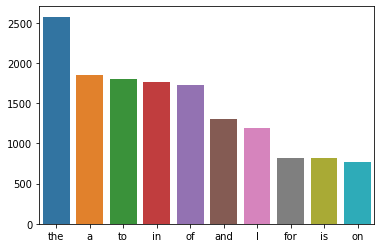

In [ ]:
sns.barplot(x = c, y = n)
plt.show()

In [ ]:
corpus_0 = []

for t in train.loc[train.target == 0].text.str.split():
  for c in t:
    corpus_0.append(c)

In [ ]:
count_0 = Counter(corpus_0)

In [ ]:
count_0.most_common(10)

[('the', 1524),
 ('a', 1115),
 ('to', 1099),
 ('I', 938),
 ('and', 840),
 ('of', 834),
 ('in', 720),
 ('you', 529),
 ('is', 512),
 ('for', 452)]

In [ ]:
corpus_1 = []

for t in train.loc[train.target == 1].text.str.split():
  for c in t:
    corpus_1.append(c)

In [ ]:
count_1 = Counter(corpus_1)

In [ ]:
count_1.most_common(10)

[('the', 1051),
 ('in', 1037),
 ('of', 888),
 ('a', 730),
 ('to', 706),
 ('and', 462),
 ('-', 389),
 ('on', 386),
 ('for', 368),
 ('is', 302)]

In [7]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
tokenizer = RegexpTokenizer('\s+', gaps = True)
stopwords = set(stopwords.words('english'))

In [9]:
clear_punc = []
for t in range(len(train.text)):
  clear_punc.append(re.sub('[!@#$%^&*()_+=,./ª?\><;":`~]', ' ' ,train.text[t]))
train['clear_punc'] = clear_punc

In [10]:
clear_punc = []
for t in range(len(test.text)):
  clear_punc.append(re.sub('[!@#$%^&*()_+=,./ª?\><;":`~]', ' ' ,test.text[t]))
test['clear_punc'] = clear_punc

In [11]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [12]:
train['clear_punc'] = train['clear_punc'].apply(lambda x : remove_URL(x))
test['clear_punc'] = test['clear_punc'].apply(lambda x : remove_URL(x))

In [13]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [14]:
train['clear_punc'] = train['clear_punc'].apply(lambda x : remove_html(x))
test['clear_punc'] = test['clear_punc'].apply(lambda x : remove_html(x))

In [15]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [16]:
train['clear_punc'] = train['clear_punc'].apply(lambda x : remove_emoji(x))
test['clear_punc'] = test['clear_punc'].apply(lambda x : remove_emoji(x))

In [17]:
token_text = []

for t in train.clear_punc:
  temp = tokenizer.tokenize(t)
  temp = [word for word in temp if not word in stopwords]
  token_text.append(temp)

train['token_text'] = token_text

In [ ]:
token_text = []

for t in test.clear_punc:
  temp = tokenizer.tokenize(t)
  temp = [word for word in temp if not word in stopwords]
  token_text.append(temp)

test['token_text'] = token_text

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
texts = pd.concat([train, test], ignore_index= True).token_text

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

In [ ]:
threshold = 6
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 29919
등장 빈도가 5번 이하인 희귀 단어의 수: 26724
단어 집합에서 희귀 단어의 비율: 89.32116715130853
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 27.382044754913572


In [ ]:
vocab_size = total_cnt - rare_cnt + 1 # 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거. 0번 패딩 토큰을 고려하여 +1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 3196


In [ ]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(texts)

In [ ]:
seq = tokenizer.texts_to_sequences(texts)
max_len = (max(len(x) for x in seq))

In [ ]:
w2x = tokenizer.word_index
w2x[0] = 'PAD'
ix2w = {j:i for i, j in w2x.items()}

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
below_threshold_len(max_len, train.token_text)

전체 샘플 중 길이가 26 이하인 샘플의 비율: 99.90805201628793


In [24]:
labels = train.target

In [ ]:
seq = pad_sequences(seq, maxlen = max_len)
tr_seq = seq[:len(labels)]
te_seq = seq[len(labels):]

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.regularizers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
from sklearn.metrics import accuracy_score

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 32, input_length = max_len))
model.add(Dropout(.2))
model.add(GRU(32, dropout = .2, recurrent_dropout = .1))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
es = EarlyStopping(monitor = 'val_acc', mode = 'max', verbose = 1, patience = 3)
mc = ModelCheckpoint('model1.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)

In [ ]:
model.compile(optimizer= RMSprop(lr = .005), loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(tr_seq, labels, epochs = 50, batch_size = 64, shuffle = True, validation_split = .1, verbose = 1, callbacks = [es,mc])

Epoch 1/50
108/108 [==============================] - ETA: 0s - loss: 0.5161 - acc: 0.7475
Epoch 00001: val_acc improved from -inf to 0.59580, saving model to model1.h5
108/108 [==============================] - 16s 150ms/step - loss: 0.5161 - acc: 0.7475 - val_loss: 0.6522 - val_acc: 0.5958
Epoch 2/50
108/108 [==============================] - ETA: 0s - loss: 0.3899 - acc: 0.8384
Epoch 00002: val_acc improved from 0.59580 to 0.80315, saving model to model1.h5
108/108 [==============================] - 16s 145ms/step - loss: 0.3899 - acc: 0.8384 - val_loss: 0.4357 - val_acc: 0.8031
Epoch 3/50
108/108 [==============================] - ETA: 0s - loss: 0.3496 - acc: 0.8591
Epoch 00003: val_acc did not improve from 0.80315
108/108 [==============================] - 15s 141ms/step - loss: 0.3496 - acc: 0.8591 - val_loss: 0.4857 - val_acc: 0.7625
Epoch 4/50
108/108 [==============================] - ETA: 0s - loss: 0.3230 - acc: 0.8672
Epoch 00004: val_acc did not improve from 0.80315
108/1

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 32, input_length = max_len))
model.add(Dropout(.3))
model.add(Conv1D(32, 3, activation='relu', kernel_regularizer = l2(0.001)))
model.add(GlobalMaxPooling1D())
model.add(Dense(32, activation = 'relu'))
#model.add(GRU(64, dropout = .2, recurrent_dropout = .1))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
es = EarlyStopping(monitor = 'val_acc', mode = 'max', verbose = 1, patience = 3)
mc = ModelCheckpoint('model2.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)

In [ ]:
model.compile(optimizer= RMSprop(lr = .0005), loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(tr_seq, labels, epochs = 50, batch_size = 64, shuffle = True, validation_split = .1, verbose = 1, callbacks = [es,mc])

Epoch 1/50
104/108 [===========================>..] - ETA: 0s - loss: 0.7018 - acc: 0.5703
Epoch 00001: val_acc improved from -inf to 0.56430, saving model to model2.h5
108/108 [==============================] - 1s 8ms/step - loss: 0.7013 - acc: 0.5713 - val_loss: 0.6902 - val_acc: 0.5643
Epoch 2/50
104/108 [===========================>..] - ETA: 0s - loss: 0.6497 - acc: 0.6821
Epoch 00002: val_acc improved from 0.56430 to 0.70997, saving model to model2.h5
108/108 [==============================] - 1s 7ms/step - loss: 0.6482 - acc: 0.6841 - val_loss: 0.6324 - val_acc: 0.7100
Epoch 3/50
107/108 [============================>.] - ETA: 0s - loss: 0.5657 - acc: 0.7742
Epoch 00003: val_acc improved from 0.70997 to 0.79134, saving model to model2.h5
108/108 [==============================] - 1s 7ms/step - loss: 0.5656 - acc: 0.7743 - val_loss: 0.5489 - val_acc: 0.7913
Epoch 4/50
106/108 [============================>.] - ETA: 0s - loss: 0.4785 - acc: 0.8091
Epoch 00004: val_acc improved fro

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length = max_len))
model.add(Dropout(0.4))
model.add(Conv1D(64, 5, strides=1, padding='valid', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 26, 128)           409088    
_________________________________________________________________
dropout_2 (Dropout)          (None, 26, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 22, 64)            41024     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [ ]:
es = EarlyStopping(monitor = 'val_acc', mode = 'max', verbose = 1, patience = 10)
mc = ModelCheckpoint('model3.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)

In [ ]:
model.compile(optimizer= RMSprop(lr = .005), loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(tr_seq, labels, epochs = 50, batch_size = 64, shuffle = True, validation_split = .1, verbose = 1, callbacks = [es,mc])

Epoch 1/50
106/108 [============================>.] - ETA: 0s - loss: 0.5123 - acc: 0.7534
Epoch 00001: val_acc improved from -inf to 0.80052, saving model to model3.h5
108/108 [==============================] - 2s 17ms/step - loss: 0.5107 - acc: 0.7543 - val_loss: 0.4486 - val_acc: 0.8005
Epoch 2/50
104/108 [===========================>..] - ETA: 0s - loss: 0.3838 - acc: 0.8421
Epoch 00002: val_acc did not improve from 0.80052
108/108 [==============================] - 1s 9ms/step - loss: 0.3837 - acc: 0.8422 - val_loss: 0.4547 - val_acc: 0.7769
Epoch 3/50
103/108 [===========================>..] - ETA: 0s - loss: 0.3246 - acc: 0.8726
Epoch 00003: val_acc did not improve from 0.80052
108/108 [==============================] - 1s 9ms/step - loss: 0.3253 - acc: 0.8720 - val_loss: 0.5139 - val_acc: 0.7690
Epoch 4/50
108/108 [==============================] - ETA: 0s - loss: 0.2693 - acc: 0.8990
Epoch 00004: val_acc did not improve from 0.80052
108/108 [==============================] - 1

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size , 64, input_length = max_len))
model.add(Conv1D(64, 3, activation = 'relu', kernel_regularizer = l2(0.01)))
model.add(MaxPooling1D(4))
model.add(Conv1D(64
                 , 2, activation = 'relu', kernel_regularizer=l2(0.001)))

model.add(GlobalMaxPooling1D())

model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 26, 64)            204544    
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 24, 64)            12352     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 6, 64)             0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 5, 64)             8256      
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                

In [ ]:
es = EarlyStopping(monitor = 'val_acc', mode = 'max', verbose = 1, patience = 3)
mc = ModelCheckpoint('model4.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)

In [ ]:
model.compile(optimizer= RMSprop(lr = .005), loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(tr_seq, labels, epochs = 50, batch_size = 32, shuffle = True, validation_split = .1, verbose = 1, callbacks = [es,mc])

Epoch 1/50
213/215 [============================>.] - ETA: 0s - loss: 0.5894 - acc: 0.7283
Epoch 00001: val_acc improved from -inf to 0.78084, saving model to model4.h5
215/215 [==============================] - 2s 11ms/step - loss: 0.5895 - acc: 0.7284 - val_loss: 0.5150 - val_acc: 0.7808
Epoch 2/50
215/215 [==============================] - ETA: 0s - loss: 0.4259 - acc: 0.8305
Epoch 00002: val_acc improved from 0.78084 to 0.80840, saving model to model4.h5
215/215 [==============================] - 2s 8ms/step - loss: 0.4259 - acc: 0.8305 - val_loss: 0.4692 - val_acc: 0.8084
Epoch 3/50
213/215 [============================>.] - ETA: 0s - loss: 0.3899 - acc: 0.8471
Epoch 00003: val_acc did not improve from 0.80840
215/215 [==============================] - 2s 8ms/step - loss: 0.3905 - acc: 0.8470 - val_loss: 0.5463 - val_acc: 0.7257
Epoch 4/50
213/215 [============================>.] - ETA: 0s - loss: 0.3639 - acc: 0.8606
Epoch 00004: val_acc did not improve from 0.80840
215/215 [====

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size , 64, input_length = max_len))
model.add(Conv1D(64, 3, activation = 'relu', kernel_regularizer = l2(0.001)))


model.add(GlobalMaxPooling1D())
model.add(Dropout(.3))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 26, 64)            204544    
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 24, 64)            12352     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 64)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total params: 217,953
Trainable params: 217,953
Non-trainable params: 0
________________________________________________

In [ ]:
es = EarlyStopping(monitor = 'val_acc', mode = 'max', verbose = 1, patience = 10)
mc = ModelCheckpoint('model5.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)
model.compile(optimizer= RMSprop(lr = .005), loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(tr_seq, labels, epochs = 50, batch_size = 64, shuffle = True, validation_split = .1, verbose = 1, callbacks = [es,mc])

Epoch 1/50
105/108 [============================>.] - ETA: 0s - loss: 0.5372 - acc: 0.7516
Epoch 00001: val_acc improved from -inf to 0.79265, saving model to model5.h5
108/108 [==============================] - 2s 15ms/step - loss: 0.5396 - acc: 0.7507 - val_loss: 0.4806 - val_acc: 0.7927
Epoch 2/50
101/108 [===========================>..] - ETA: 0s - loss: 0.3974 - acc: 0.8433
Epoch 00002: val_acc did not improve from 0.79265
108/108 [==============================] - 1s 7ms/step - loss: 0.4010 - acc: 0.8425 - val_loss: 0.5605 - val_acc: 0.7717
Epoch 3/50
105/108 [============================>.] - ETA: 0s - loss: 0.3477 - acc: 0.8687
Epoch 00003: val_acc did not improve from 0.79265
108/108 [==============================] - 1s 7ms/step - loss: 0.3485 - acc: 0.8682 - val_loss: 0.5079 - val_acc: 0.7651
Epoch 4/50
102/108 [===========================>..] - ETA: 0s - loss: 0.3036 - acc: 0.8917
Epoch 00004: val_acc did not improve from 0.79265
108/108 [==============================] - 1

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size , 64, input_length = max_len))
model.add(Dropout(.3))
model.add(Conv1D(64, 3, activation = 'relu', kernel_regularizer = l2(0.001)))


model.add(MaxPooling1D())
model.add(LSTM(64, dropout = .3))
model.add(Dropout(.3))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 26, 64)            204544    
_________________________________________________________________
dropout_7 (Dropout)          (None, 26, 64)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 24, 64)            12352     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 12, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 16)               

In [ ]:
es = EarlyStopping(monitor = 'val_acc', mode = 'max', verbose = 1, patience = 5)
mc = ModelCheckpoint('model6.h5', monitor = 'val_acc', mode = 'max', verbose = 1, save_best_only = True)
model.compile(optimizer= RMSprop(lr = .005), loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(tr_seq, labels, epochs = 50, batch_size = 64, shuffle = True, validation_split = .1, verbose = 1, callbacks = [es,mc])

Epoch 1/50
107/108 [============================>.] - ETA: 0s - loss: 0.5454 - acc: 0.7518
Epoch 00001: val_acc improved from -inf to 0.81627, saving model to model6.h5
108/108 [==============================] - 2s 22ms/step - loss: 0.5453 - acc: 0.7519 - val_loss: 0.4374 - val_acc: 0.8163
Epoch 2/50
104/108 [===========================>..] - ETA: 0s - loss: 0.4103 - acc: 0.8355
Epoch 00002: val_acc did not improve from 0.81627
108/108 [==============================] - 1s 10ms/step - loss: 0.4102 - acc: 0.8361 - val_loss: 0.5307 - val_acc: 0.7769
Epoch 3/50
103/108 [===========================>..] - ETA: 0s - loss: 0.3702 - acc: 0.8580
Epoch 00003: val_acc did not improve from 0.81627
108/108 [==============================] - 1s 11ms/step - loss: 0.3705 - acc: 0.8575 - val_loss: 0.4900 - val_acc: 0.8163
Epoch 4/50
105/108 [============================>.] - ETA: 0s - loss: 0.3436 - acc: 0.8698
Epoch 00004: val_acc did not improve from 0.81627
108/108 [==============================] -

In [ ]:
model = load_model('model2.h5')

In [ ]:
submission.target = model.predict_classes(te_seq)

In [ ]:
submission.to_csv('2nd.csv', index = False)

In [ ]:
cd /content/gdrive/My Drive/mlp_disaster/nlp-getting-started

/content/gdrive/My Drive/mlp_disaster/nlp-getting-started


## TF-IDF  & XGB + LGBM

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [ ]:
tfidf = TfidfVectorizer(max_features = 1000)

In [ ]:
tfidf_input = list(pd.concat([train.clear_punc,test.clear_punc], axis = 0, ignore_index = True))

In [ ]:
tfidf_vec = tfidf.fit_transform(tfidf_input)

In [ ]:
tfidf_vec.shape

(10876, 1000)

In [ ]:
kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 777)

In [ ]:
score = cross_val_score(XGBClassifier(random_state = 777), tfidf_vec[:len(labels)], labels, cv = kf, scoring = 'accuracy')

In [ ]:
score.mean()

0.7399177568996802

In [ ]:
score = cross_val_score(LGBMClassifier(random_state = 777), tfidf_vec[:len(labels)], labels, cv = kf, scoring = 'accuracy')

In [ ]:
score.mean()

0.7886474840876168

## BERT 이용

In [5]:
import tensorflow as tf
import torch
!pip install transformers
from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.model_selection import train_test_split

import random
import time
import datetime

     |████████████████████████████████| 757kB 2.8MB/s 
     |████████████████████████████████| 890kB 13.6MB/s 
     |████████████████████████████████| 1.1MB 16.5MB/s 
     |████████████████████████████████| 3.0MB 23.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=916aa3a29a9102e42a7c3fe0481af970363ea6d224606639b9672685b97815bf
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [19]:
# 리뷰 문장 추출
sentences = list(pd.concat([train.clear_punc, test.clear_punc], axis = 0, ignore_index = True))

In [20]:
# BERT의 입력 형식에 맞게 변환
sentences = ["[CLS] " + str(sentence) + " [SEP]" for sentence in sentences]
sentences[:10]

['[CLS] Our Deeds are the Reason of this  earthquake May ALLAH Forgive us all [SEP]',
 '[CLS] Forest fire near La Ronge Sask  Canada [SEP]',
 "[CLS] All residents asked to 'shelter in place' are being notified by officers  No other evacuation or shelter in place orders are expected [SEP]",
 '[CLS] 13 000 people receive  wildfires evacuation orders in California  [SEP]',
 '[CLS] Just got sent this photo from Ruby  Alaska as smoke from  wildfires pours into a school  [SEP]',
 '[CLS]  RockyFire Update    California Hwy  20 closed in both directions due to Lake County fire -  CAfire  wildfires [SEP]',
 '[CLS]  flood  disaster Heavy rain causes flash flooding of streets in Manitou  Colorado Springs areas [SEP]',
 "[CLS] I'm on top of the hill and I can see a fire in the woods    [SEP]",
 "[CLS] There's an emergency evacuation happening now in the building across the street [SEP]",
 "[CLS] I'm afraid that the tornado is coming to our area    [SEP]"]

In [37]:
# BERT의 토크나이저로 문장을 토큰으로 분리
tokenizer = BertTokenizer.from_pretrained('bert-base-cased', do_lower_case=False)
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

print (sentences[0])
print (tokenized_texts[0])


[CLS] Our Deeds are the Reason of this  earthquake May ALLAH Forgive us all [SEP]
['[CLS]', 'Our', 'Dee', '##ds', 'are', 'the', 'Reason', 'of', 'this', 'earthquake', 'May', 'AL', '##LA', '##H', 'For', '##gi', '##ve', 'us', 'all', '[SEP]']


In [38]:
# 입력 토큰의 최대 시퀀스 길이
MAX_LEN = max(len(x) for x in tokenized_texts)

# 토큰을 숫자 인덱스로 변환
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

# 문장을 MAX_LEN 길이에 맞게 자르고, 모자란 부분을 패딩 0으로 채움
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

input_ids[0]

array([  101,  3458,  9115,  3680,  1132,  1103, 21642,  1104,  1142,
        8386,  1318, 18589, 10783,  3048,  1370,  5389,  2707,  1366,
        1155,   102,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0])

In [39]:
train_input_ids = input_ids[:len(labels)]
test_input_ids = input_ids[len(labels):]
len(train_input_ids)
len(test_input_ids)

3263

In [40]:
# 어텐션 마스크 초기화
attention_masks = []

# 어텐션 마스크를 패딩이 아니면 1, 패딩이면 0으로 설정
# 패딩 부분은 BERT 모델에서 어텐션을 수행하지 않아 속도 향상
for seq in train_input_ids:
    seq_mask = [float(i>0) for i in seq]
    attention_masks.append(seq_mask)

print(attention_masks[0])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [41]:
train_attention = attention_masks[:len(labels)]
test_attention = attention_masks[len(labels):]

In [42]:
# 훈련셋과 검증셋으로 분리
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(train_input_ids,
                                                                                    labels, 
                                                                                    random_state=2018, 
                                                                                    test_size=0.1)

# 어텐션 마스크를 훈련셋과 검증셋으로 분리
train_masks, validation_masks, _, _ = train_test_split(train_attention, 
                                                       train_input_ids,
                                                       random_state=2018, 
                                                       test_size=0.1)

# 데이터를 파이토치의 텐서로 변환
train_inputs = torch.tensor(train_inputs)
train_labels = torch.tensor(list(train_labels))
train_masks = torch.tensor(train_masks)
validation_inputs = torch.tensor(validation_inputs)
validation_labels = torch.tensor(list(validation_labels))
validation_masks = torch.tensor(validation_masks)				

print(train_inputs[0])
print(train_labels[0])
print(train_masks[0])
print(validation_inputs[0])
print(validation_labels[0])
print(validation_masks[0])

tensor([  101,  9371, 11074,  1624,  2107, 25669,  1324, 16382,  1580,  1580,
         1139,  2179,  1198,  9736,  5871,  2328,   102,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0])
tensor(0)
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.])
tensor([  101, 

In [43]:
# 배치 사이즈
batch_size = 32

# 파이토치의 DataLoader로 입력, 마스크, 라벨을 묶어 데이터 설정
# 학습시 배치 사이즈 만큼 데이터를 가져옴
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [44]:
# GPU 디바이스 이름 구함
device_name = tf.test.gpu_device_name()

# GPU 디바이스 이름 검사
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [45]:
# 디바이스 설정
if torch.cuda.is_available():    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('No GPU available, using the CPU instead.')

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [66]:
# 분류를 위한 BERT 모델 생성
model = BertForSequenceClassification.from_pretrained("bert-base-cased", num_labels=2)
model.cuda()

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [67]:
# 옵티마이저 설정
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # 학습률
                  eps = 1e-8 # 0으로 나누는 것을 방지하기 위한 epsilon 값
                )

# 에폭수
epochs = 3

# 총 훈련 스텝 : 배치반복 횟수 * 에폭
total_steps = len(train_dataloader) * epochs

# 학습률을 조금씩 감소시키는 스케줄러 생성
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [34]:
# 정확도 계산 함수
def flat_accuracy(preds, labels):
    
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [35]:
# 시간 표시 함수
def format_time(elapsed):

    # 반올림
    elapsed_rounded = int(round((elapsed)))
    
    # hh:mm:ss으로 형태 변경
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [68]:
# 재현을 위해 랜덤시드 고정
seed_val = 777
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# 그래디언트 초기화
model.zero_grad()

# 에폭만큼 반복
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # 시작 시간 설정
    t0 = time.time()

    # 로스 초기화
    total_loss = 0

    # 훈련모드로 변경
    model.train()
        
    # 데이터로더에서 배치만큼 반복하여 가져옴
    for step, batch in enumerate(train_dataloader):
        # 경과 정보 표시
        if step % 500 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # 배치를 GPU에 넣음
        batch = tuple(t.to(device) for t in batch)
        
        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch

        # Forward 수행                
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask, 
                        labels=b_labels)
        
        # 로스 구함
        loss = outputs[0]

        # 총 로스 계산
        total_loss += loss.item()

        # Backward 수행으로 그래디언트 계산
        loss.backward()

        # 그래디언트 클리핑
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # 그래디언트를 통해 가중치 파라미터 업데이트
        optimizer.step()

        # 스케줄러로 학습률 감소
        scheduler.step()

        # 그래디언트 초기화
        model.zero_grad()

    # 평균 로스 계산
    avg_train_loss = total_loss / len(train_dataloader)            

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    #시작 시간 설정
    t0 = time.time()

    # 평가모드로 변경
    model.eval()

    # 변수 초기화
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # 데이터로더에서 배치만큼 반복하여 가져옴
    for batch in validation_dataloader:
        # 배치를 GPU에 넣음
        batch = tuple(t.to(device) for t in batch)
        
        # 배치에서 데이터 추출
        b_input_ids, b_input_mask, b_labels = batch
        
        # 그래디언트 계산 안함
        with torch.no_grad():     
            # Forward 수행
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # 로스 구함
        logits = outputs[0]

        # CPU로 데이터 이동
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # 출력 로짓과 라벨을 비교하여 정확도 계산
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        eval_accuracy += tmp_eval_accuracy
        nb_eval_steps += 1

    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 3 ========
Training...

  Average training loss: 0.46
  Training epcoh took: 0:01:02

Running Validation...
  Accuracy: 0.84
  Validation took: 0:00:02

======== Epoch 2 / 3 ========
Training...

  Average training loss: 0.33
  Training epcoh took: 0:01:01

Running Validation...
  Accuracy: 0.85
  Validation took: 0:00:02

======== Epoch 3 / 3 ========
Training...

  Average training loss: 0.25
  Training epcoh took: 0:01:01

Running Validation...
  Accuracy: 0.84
  Validation took: 0:00:02

Training complete!


In [54]:
# 입력 데이터 변환
def convert_input_data(sentences):

    # BERT의 토크나이저로 문장을 토큰으로 분리
    tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]

    # 입력 토큰의 최대 시퀀스 길이
    MAX_LEN = max(len(x) for x in tokenized_texts)

    # 토큰을 숫자 인덱스로 변환
    input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
    
    # 문장을 MAX_LEN 길이에 맞게 자르고, 모자란 부분을 패딩 0으로 채움
    input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

    # 어텐션 마스크 초기화
    attention_masks = []

    # 어텐션 마스크를 패딩이 아니면 1, 패딩이면 0으로 설정
    # 패딩 부분은 BERT 모델에서 어텐션을 수행하지 않아 속도 향상
    for seq in input_ids:
        seq_mask = [float(i>0) for i in seq]
        attention_masks.append(seq_mask)

    # 데이터를 파이토치의 텐서로 변환
    inputs = torch.tensor(input_ids)
    masks = torch.tensor(attention_masks)

    return inputs, masks

In [55]:
# 문장 테스트
def test_sentences(sentences):

    # 평가모드로 변경
    model.eval()

    # 문장을 입력 데이터로 변환
    inputs, masks = convert_input_data(sentences)

    # 데이터를 GPU에 넣음
    b_input_ids = inputs.to(device)
    b_input_mask = masks.to(device)
            
    # 그래디언트 계산 안함
    with torch.no_grad():     
        # Forward 수행
        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask)

    # 로스 구함
    logits = outputs[0]

    # CPU로 데이터 이동
    logits = logits.detach().cpu().numpy()

    return logits

In [56]:
pred = []
for i in sentences[len(labels):]:
  logit = test_sentences([i])
  pred.append(np.argmax(logit))

In [57]:
submission.target = pred

In [58]:
submission.to_csv('bert_3rd.csv', index = False)